In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, acovf

## Problem 1
(1) Simulate and plot the IID noise $\{Z_t\} \sim N(0, \sigma_Z^2 = 1)$, for $t = 1, 2, \dots, 201$

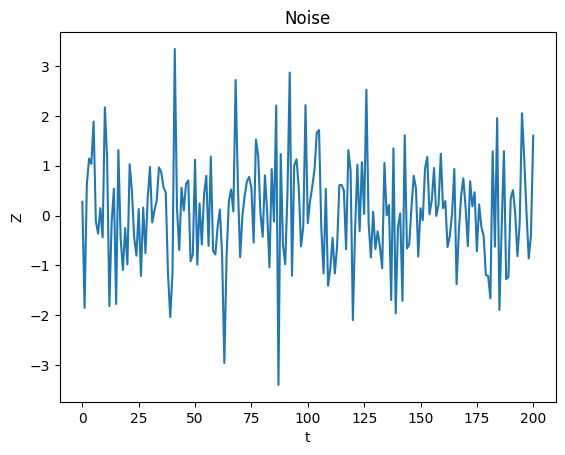

In [4]:
np.random.seed(17)

# parameters 
n = 201
var = 1

# generate IID noise 
Z = np.random.normal(0, var, n)

# plot IID noise
plt.plot(Z)
plt.title("Noise")
plt.xlabel("t")
plt.ylabel("Z")
plt.show()

(2) Simulate and plot $X_t, t = 2, 3, \dots, 200$, in the same diagram of $\{Z_t\}$ with different colors. What can you say about the **volatility** of the two graphs?

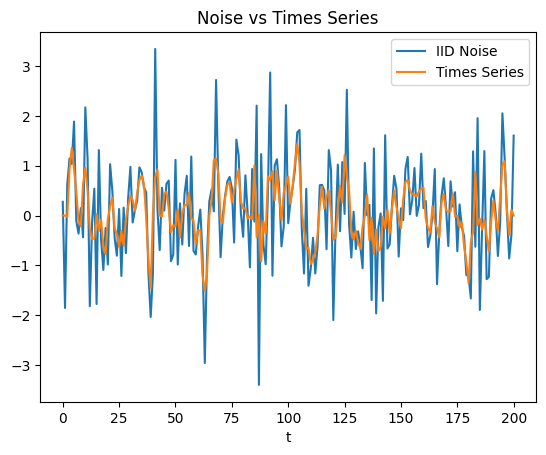

In [5]:
X = np.zeros_like(Z)
for t in range(2,200):
    X[t] = (1/3) * (Z[t-1] + Z[t] + Z[t+1])

X[0] = 0

# plotting 
plt.plot(Z)
plt.plot(X)
plt.title("Noise vs Times Series")
plt.xlabel("t")
plt.legend(["IID Noise","Times Series"])
plt.show()

From looking at the graph, we can see the volatility of the time series is significantly less than that of the IID noise. $\\$
(3) Compute the theoretical autocorrelation function (ACF) of $\{X_t\}$ by hand. Note that we don’t need any samples or observations for the computation.

$\mathbb{E}[X_t] = \frac{1}{3}(0) = 0, \text{Var}(X_t) = \frac{1}{9}$

$\gamma_x(h) = \frac{1}{9}\text{Cov}(Z_{t-1}+Z_{t} + Z_{t+1}, Z_{t-1}+Z_{t} + Z_{t+1}) \\$
$\begin{cases}
\gamma_x(0) = \frac{1}{3} \\ \gamma_x(1) = \frac{2}{9} \\ \gamma_x(2) = \frac{1}{9}
\end{cases} \implies 
\begin{cases}
\rho_x(0) = 1 \\ \rho_x(1) = \frac{2}{3} \\ \rho_x(2) = \frac{1}{3}
\end{cases}$

(4) Compare the theoretical ACF of $\{X_t\}$ for $h = 0,1,2, \dots,20$ you derived in question 3 with the sample ACF.

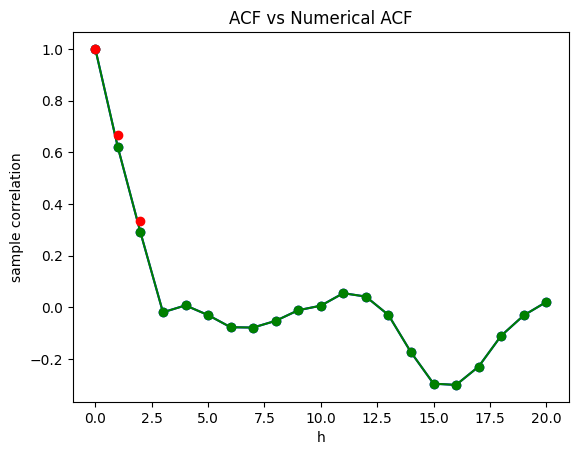

In [6]:
# sample mean acf()
x_sample_mean = np.mean(X)

# acf
x_sample_acf = acf(X, nlags = 20)

acvf = np.zeros(21)
for h in range(21):
    acvf[h] = (1/n) * np.sum((X[0:n-h] - x_sample_mean)*(X[h:n] - x_sample_mean))

x_numerical_acf = acvf / acvf[0]

plt.plot(x_sample_acf, marker = 'o',color = 'blue')
plt.plot(x_numerical_acf, marker = 'o', color = 'green')
plt.plot(0, 1, 'o', color = 'red')
plt.plot(1, 2/3, 'o', color = 'red')
plt.plot(2, 1/3, 'o', color = 'red')
plt.xlabel('h')
plt.ylabel('sample correlation')
plt.title('ACF vs Numerical ACF')
plt.show()

## Problem 2
Consider the second-order moving average process MA(2) given by $\\
X_t^1 = Z_t - 0.5Z_{t-1} + 0.25Z_{t-2}, \\$ and the process MA(4) given by $\\ X_t^2 = Z_t - 0.5Z_{t-1} + 0.25Z_{t-2} + 0.2Z_{t-3} - 0.3Z_{t-4},\\$ where $\{Z_t\} \sim WN(0, \sigma^2_Z = 1)$.
* Simulate the plot $X_t^1 \text{ and } X_t^2, t = 1, 2, \dots, 100$ in the same diagram (total observation of time series $X_t$ is 100) using different colors.
* Plot the sample ACF $\hat{\rho}_X^1(h)$ for $h = 0, 1, \dots, 20$  based on the realization $\{x_t^1\}$.
* Plot the sample ACF $\hat{\rho}_X^2(h)$ for $h = 0, 1, \dots, 20$  based on the realization $\{x_t^2\}$.
* Suppose the equations (1) and (2) are not given, i.e., you don’t know the order of the moving averaged processes. The only thing you know is the sample ACF diagrams for two MA processes you obtained in (2) and (3), can you tell the order of the moving average process? Explain you answer.

In [8]:
# set seed
np.random.seed(243)

# establish parameters 
n = 100 
var = 1

# create noise
Z = np.random.normal(0, var, n)

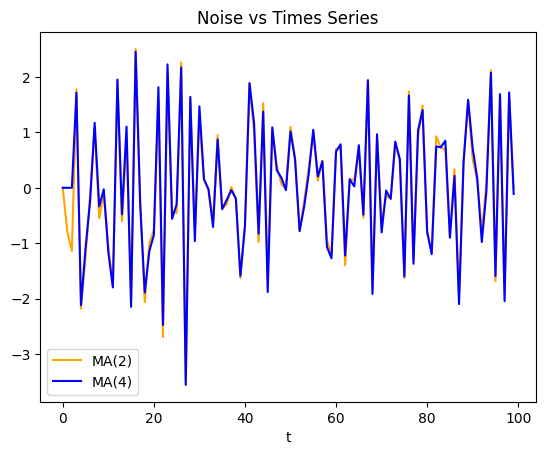

In [9]:
# creating MA(2) series
X1 = np.zeros_like(Z)

for t in range(1,100):
    X1[t] = Z[t] - (0.5 * Z[t-1]) + (0.25 * Z[t-2])

X1[0] = 0

# creating MA(4) series
X2 = np.zeros_like(Z)

for t in range(3,100):
    X2[t] = Z[t] - (0.5 * Z[t-1]) + (0.25 * Z[t-2]) + (0.2 * Z[t-3]) - (0.3 * Z[t-3])

X2[0:2] = 0

plt.plot(X1, color = 'orange')
plt.plot(X2, color = 'blue')
plt.title("Noise vs Times Series")
plt.xlabel("t")
plt.legend(["MA(2)","MA(4)"])
plt.show()

In [10]:
# samples means - have to remove None values from X's, everything else should work after
x1_sample_mean = np.mean(X1)
x2_sample_mean = np.mean(X2)

# getting acfs
x1_sample_acf = acf(X1, nlags = 20)
x2_sample_acf = acf(X2, nlags = 20)

# calculating sample acvfs
x1_acvf = np.zeros(21)
x2_acvf = np.zeros(21)

for h in range(21):
    x1_acvf[h] = (1/n) * np.sum((X1[0:n-h] - x1_sample_mean)*(X1[h:n] - x1_sample_mean))
    x2_acvf[h] = (1/n) * np.sum((X2[0:n-h] - x2_sample_mean)*(X2[h:n] - x2_sample_mean))


x1_numerical_acf = x1_acvf / x1_acvf[0]
x2_numerical_acf = x2_acvf / x2_acvf[0]

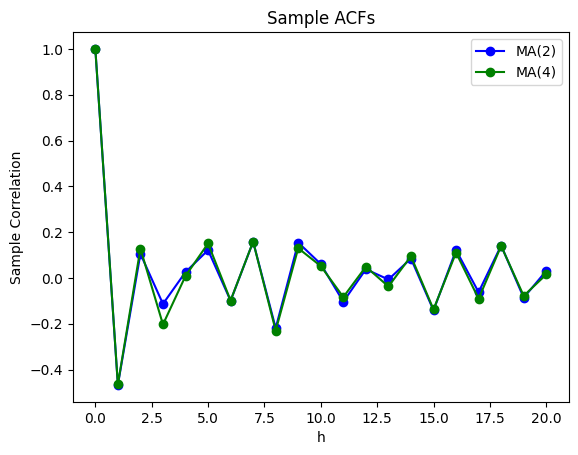

In [11]:
# plotting 
plt.plot(x1_numerical_acf, marker = 'o',color = 'blue')
plt.plot(x2_numerical_acf, marker = 'o', color = 'green')
plt.xlabel('h')
plt.ylabel('Sample Correlation')
plt.title('Sample ACFs')
plt.legend(["MA(2)","MA(4)"])
plt.show()

From the graph of the sample acf values, you can see that $\hat{\rho} \approx 0$ at h = 2 for the blue line (it starts two after MA(4)) and at h = 4 for the green line. Thus you would be able to to conclude the two models are MA(2) and MA(4) respectively. 

## Problem 3
Consider a random walk process with a drift term: $\\ X_t = bt + \sum_{i = 1}^{t} Z_t, X_0 = 0$, where $Z_t \sim^{iid} WN(0,1) \\ \bullet$ Simulate $n = 100$ observations of a random walk with $b = 0.8$ and $b = −0.2$ respectively and plot both realizations. $\\ \bullet$ Plot $y = 0.8t$ and $y = −0.2t$ on the same diagram, what do you observe?

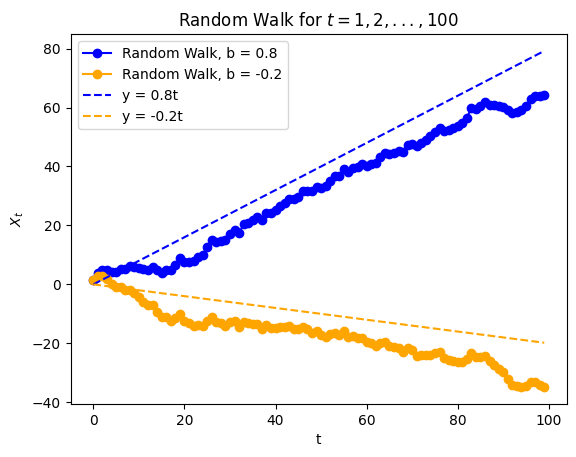

In [12]:
# parameters and set seed
n = 100
b1 = 0.8
b2 = - 0.2
np.random.seed(3751)

# for graphing lines later
t = np.arange(100)
y1 = 0.8 * t
y2 = - 0.2 * t

# generate noise
Z = np.random.normal(0, 1, n)

# generate random walks
X1 = np.zeros(100)
X1 = b1 * t + np.cumsum(Z)

X2 = np.zeros(100)
X2 = b2 * t + np.cumsum(Z)

# plotting random walks
plt.rcParams['text.usetex'] == True
plt.plot(X1, marker = 'o', color = 'blue', label = 'Random Walk, b = 0.8')
plt.plot(X2, marker = 'o', color = 'orange', label = 'Random Walk, b = -0.2')
# plotting slashed lines y = 0.8t and y = -0.2t
plt.plot(t, y1, linestyle = '--', color = 'blue', label = 'y = 0.8t')
plt.plot(t, y2, linestyle = '--', color = 'orange', label = 'y = -0.2t')
plt.xlabel('t')
plt.ylabel('$X_t$')
plt.title('Random Walk for $t = 1, 2, ..., 100$')
plt.legend(loc='upper left', fontsize='medium')
plt.show()
